In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('train_aWnotuB.csv')
test_data = pd.read_csv('datasets_8494_11879_test_BdBKkAj.csv')

In [3]:
train_data.head(5)

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [4]:
test_data.head(5)

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041


In [5]:
print(train_data.isna().sum(),end="\n\n")
print(test_data.isna().sum())

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

DateTime    0
Junction    0
ID          0
dtype: int64


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  11808 non-null  object
 1   Junction  11808 non-null  int64 
 2   ID        11808 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 276.9+ KB


In [8]:
import time as t

In [9]:
# date to unix

def date2unix(df):
    unixtime = []
    
    for date in df['DateTime']:
        unixtime.append(t.mktime(date.timetuple()))
    df['DateTime'] = unixtime
    return(df)

In [10]:
# Converting to datetime
train_data['DateTime'] = pd.to_datetime(train_data['DateTime'])
test_data['DateTime'] = pd.to_datetime(test_data['DateTime'])

In [11]:
print(train_data.size,test_data.size,sep="\n\n")

192480

35424


In [12]:
train_data.Vehicles.sum()

1096719

In [13]:
train_data.head(3)

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021


In [14]:
from datetime import datetime as dt

In [15]:
# Creating features from date for train_data

train_data['Weekday'] = [dt.weekday(date) for date in train_data.DateTime]
train_data['Year'] = [date.year for date in train_data.DateTime]
train_data['Month'] = [date.month for date in train_data.DateTime]
train_data['Day'] = [date.day for date in train_data.DateTime]
train_data['Time'] = [((date.hour*60+(date.minute))*60)+date.second for date in train_data.DateTime]
train_data['Week'] = [date.week for date in train_data.DateTime]
train_data['Quarter'] = [date.quarter for date in train_data.DateTime]

In [16]:
# Creating features from date for test_data

test_data['Weekday'] = [dt.weekday(date) for date in test_data.DateTime]
test_data['Year'] = [date.year for date in test_data.DateTime]
test_data['Month'] = [date.month for date in test_data.DateTime]
test_data['Day'] = [date.day for date in test_data.DateTime]
test_data['Time'] = [((date.hour*60+(date.minute))*60)+date.second for date in test_data.DateTime]
test_data['Week'] = [date.week for date in test_data.DateTime]
test_data['Quarter'] = [date.quarter for date in test_data.DateTime]

In [17]:
train_data.head(5)

,DateTime,Junction,Vehicles,ID,Weekday,Year,Month,Day,Time,Week,Quarter
0,2015-11-01 00:00:00,1,15,20151101001,6,2015,11,1,0,44,4
1,2015-11-01 01:00:00,1,13,20151101011,6,2015,11,1,3600,44,4
2,2015-11-01 02:00:00,1,10,20151101021,6,2015,11,1,7200,44,4
3,2015-11-01 03:00:00,1,7,20151101031,6,2015,11,1,10800,44,4
4,2015-11-01 04:00:00,1,9,20151101041,6,2015,11,1,14400,44,4


In [18]:
test_data.head(5)

,DateTime,Junction,ID,Weekday,Year,Month,Day,Time,Week,Quarter
0,2017-07-01 00:00:00,1,20170701001,5,2017,7,1,0,26,3
1,2017-07-01 01:00:00,1,20170701011,5,2017,7,1,3600,26,3
2,2017-07-01 02:00:00,1,20170701021,5,2017,7,1,7200,26,3
3,2017-07-01 03:00:00,1,20170701031,5,2017,7,1,10800,26,3
4,2017-07-01 04:00:00,1,20170701041,5,2017,7,1,14400,26,3


In [19]:
train_data.ID.unique

<bound method Series.unique of 0        20151101001
1        20151101011
2        20151101021
3        20151101031
4        20151101041
            ...     
48115    20170630194
48116    20170630204
48117    20170630214
48118    20170630224
48119    20170630234
Name: ID, Length: 48120, dtype: int64>

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
train_features = train_data.drop(['Vehicles','Year','Quarter','Month','ID'],axis=1)

In [22]:
train_features = date2unix(train_features)

In [23]:
X = train_features.values

In [24]:
y = train_data['Vehicles'].values

In [25]:
# tree_class.fit(X,y)
#linear_model.fit(X,y)
dec_tree = DecisionTreeClassifier(criterion='gini',random_state=42)

In [26]:
test_features = date2unix(test_data.drop(['Year','Quarter','Month','ID'],axis=1))

In [27]:
X_test = test_features.values

In [28]:
dec_tree.fit(X,y)

DecisionTreeClassifier(random_state=42)

In [29]:
solution = pd.DataFrame()

In [30]:
solution['ID'] = test_data.ID

In [31]:
y_pred = dec_tree.predict(X_test)

In [32]:
solution['Vehicles'] = y_pred

In [33]:
solution.Vehicles.sum()

378542

In [34]:
solution

,ID,Vehicles
0,20170701001,68
1,20170701011,62
2,20170701021,52
3,20170701031,39
4,20170701041,34
...,...,...
11803,20171031194,30
11804,20171031204,30
11805,20171031214,16
11806,20171031224,22


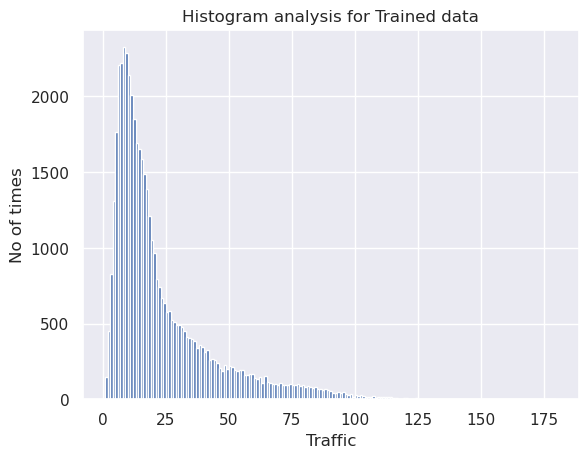

In [35]:
data = train_data.Vehicles
sns.set()
binwidth = 1
plt.hist(data,bins=range(min(data),max(data)+binwidth,binwidth),log=False)
plt.title("Histogram analysis for Trained data")
plt.xlabel("Traffic")
plt.ylabel("No of times")
plt.show()

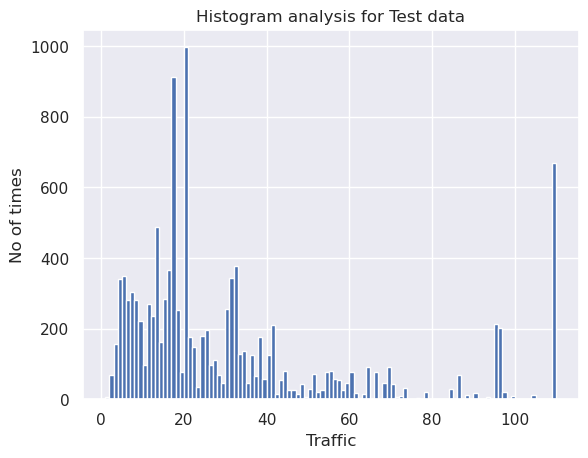

In [36]:
data = y_pred
sns.set()
binwidth = 1
plt.hist(data,bins=range(min(data),max(data)+binwidth,binwidth),log=False)
plt.title("Histogram analysis for Test data")
plt.xlabel("Traffic")
plt.ylabel("No of times")
plt.show()